In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

In [3]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 139 kB/s eta 0:00:01
     |████████████████████████████████| 46 kB 4.9 MB/s eta 0:00:011


In [2]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [9]:
# Read the CSV file 
df = pd.read_csv('telecom_churn.csv')

In [10]:
# Load the top 5 instances
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
# Check the shape of the dataframe
df.shape

(5000, 21)

In [13]:
# Display the feature columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [14]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

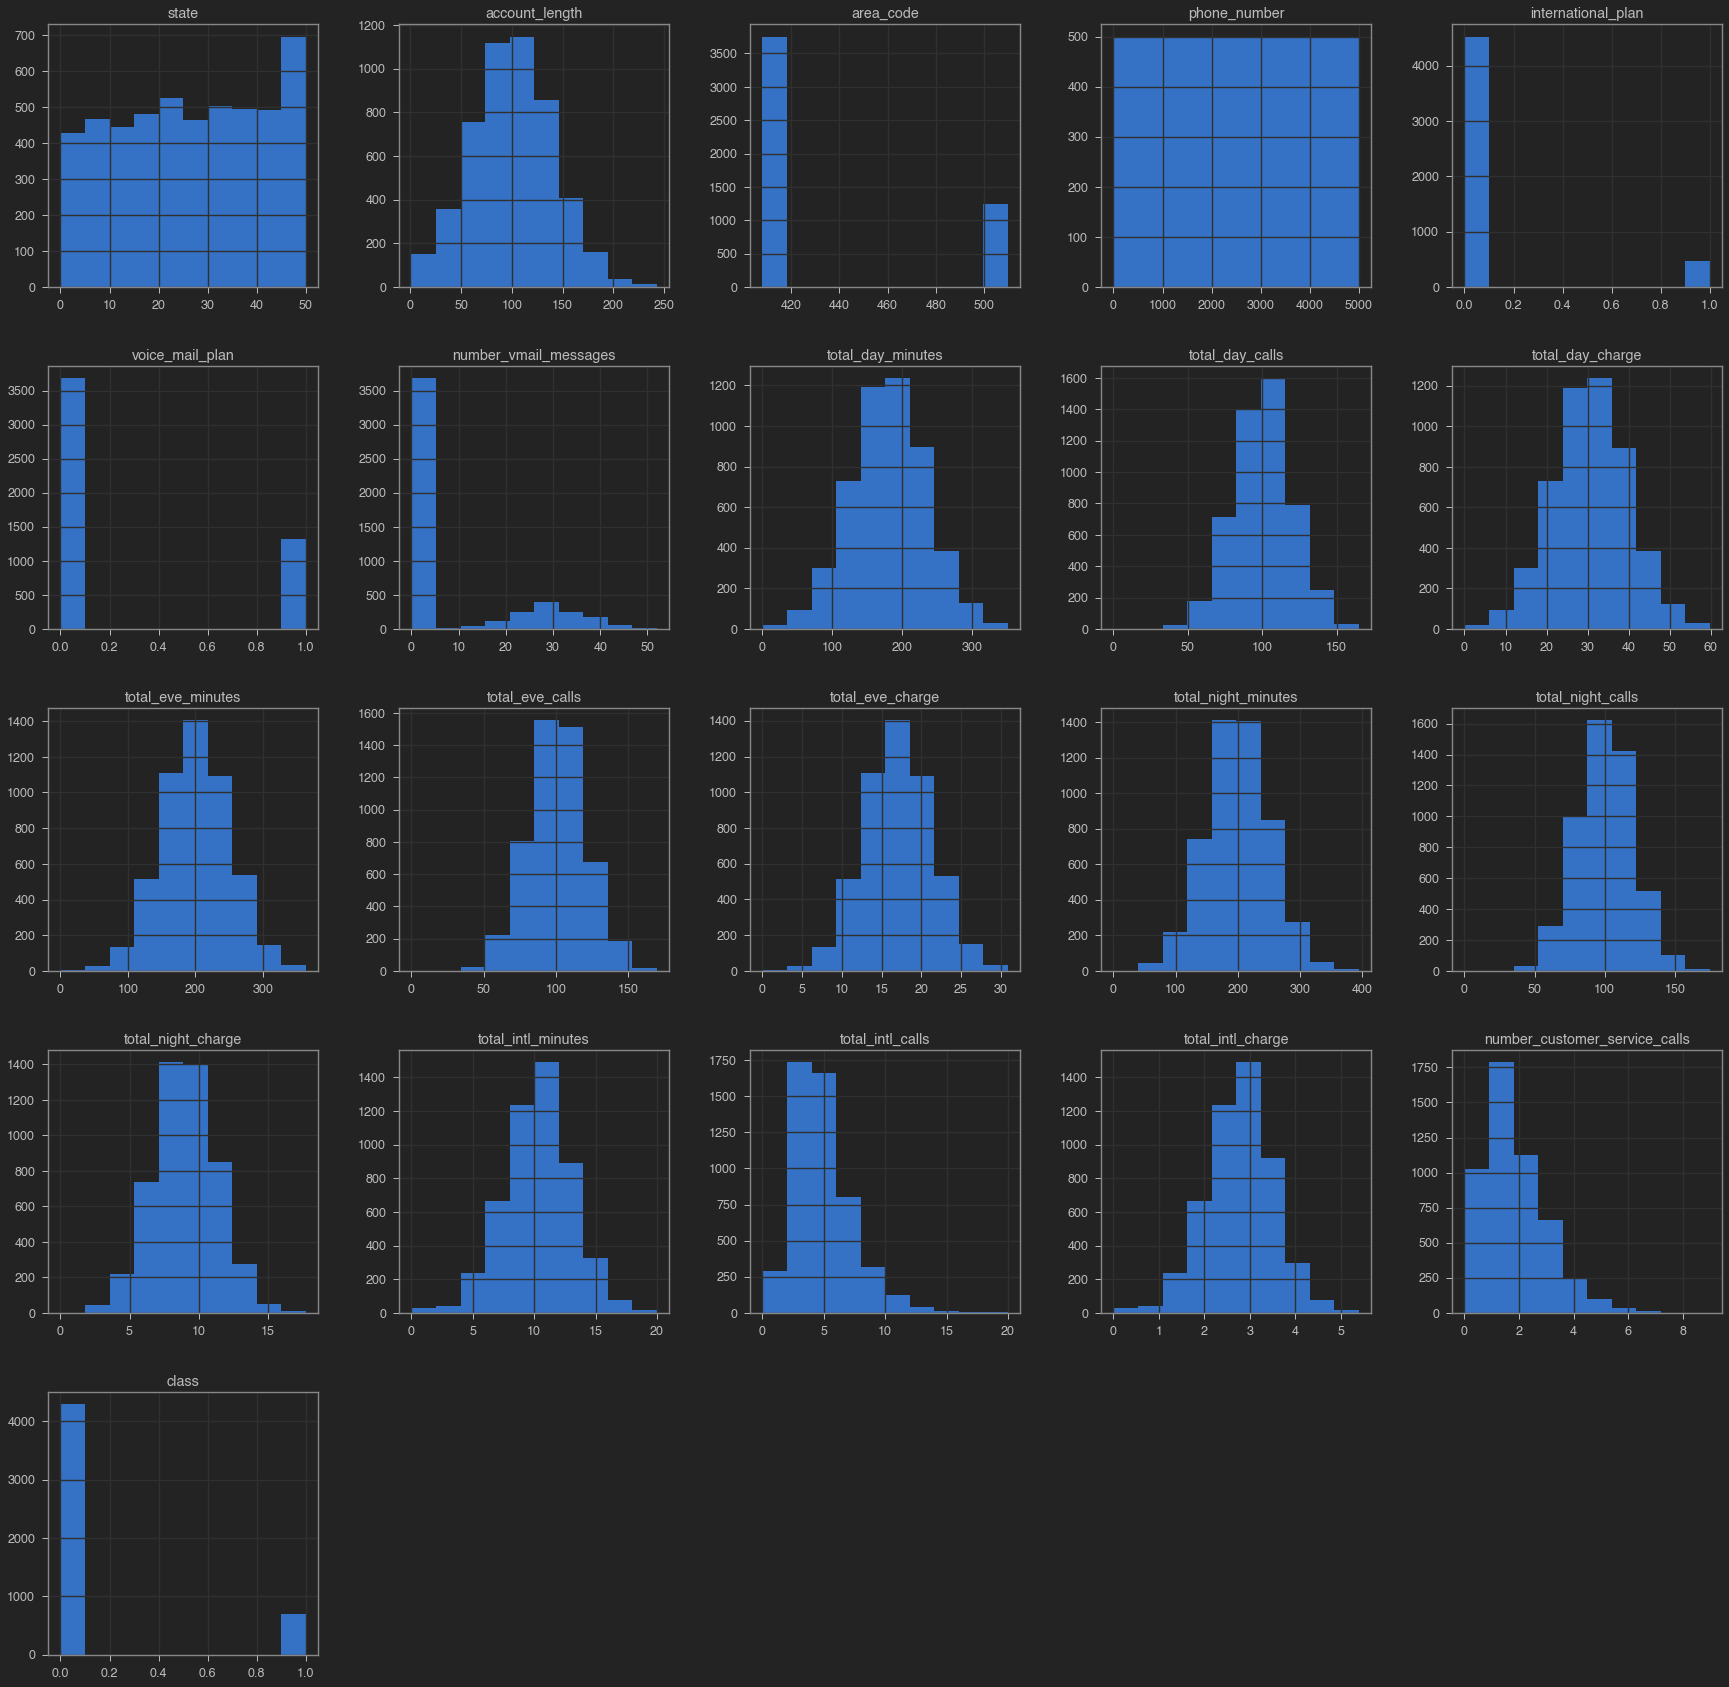

In [24]:
df.hist(figsize=(30,30))
plt.show()

In [17]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['Retained (0)', 'Churned (1)'], values = df['class'].value_counts())])
fig.show()

In [24]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(df, x='international_plan', color='class')
fig.show()

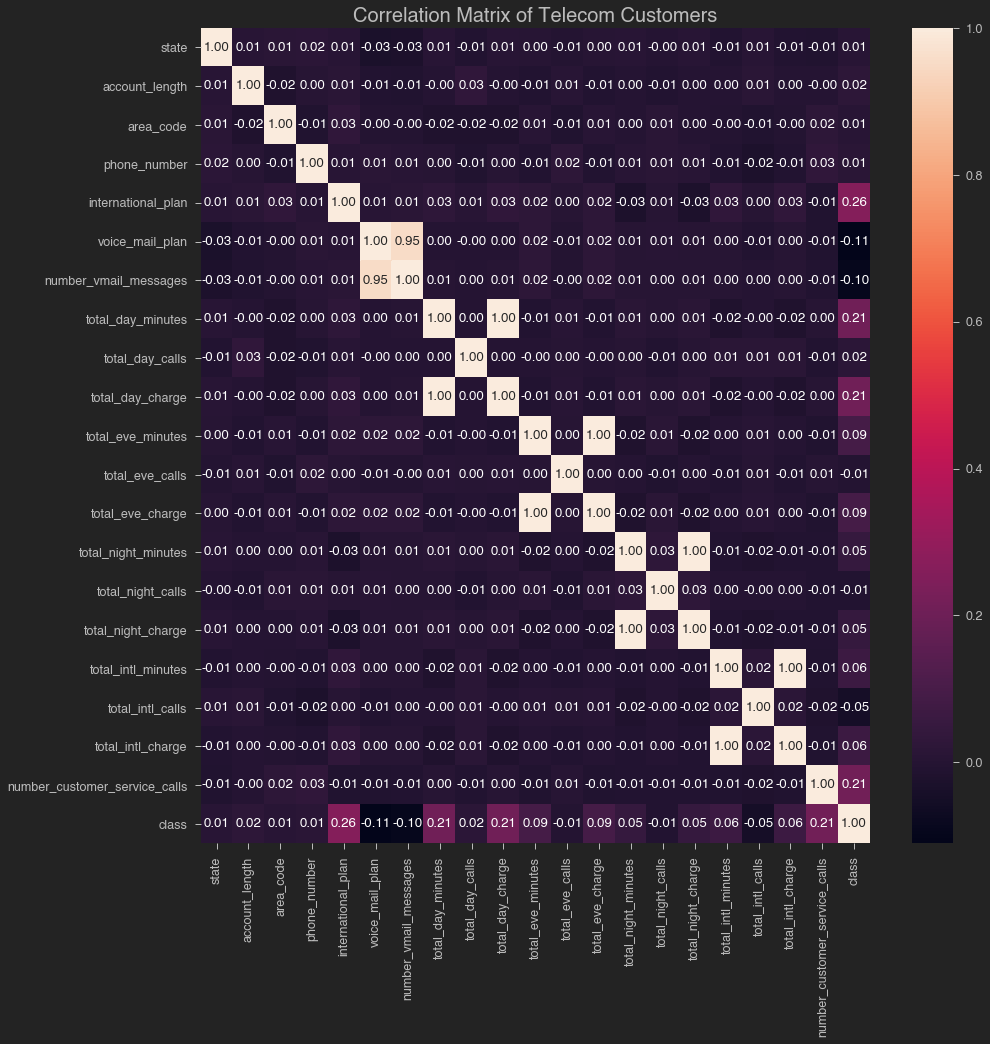

In [33]:
# Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f' )
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

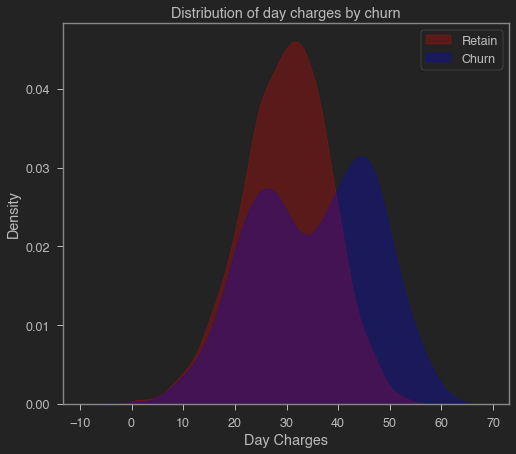

In [34]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

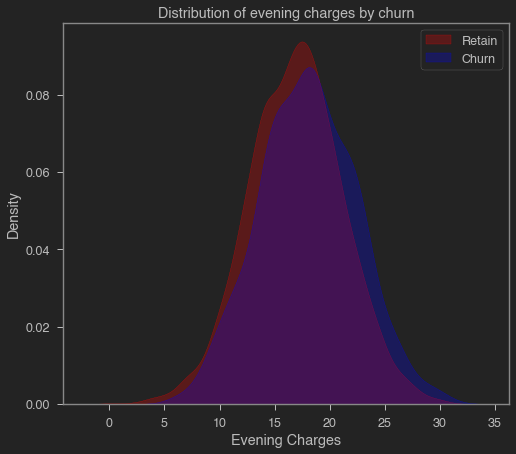

In [35]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [39]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(df, x='voice_mail_plan', color='class')
fig.show()

In [38]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["class"]

In [43]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

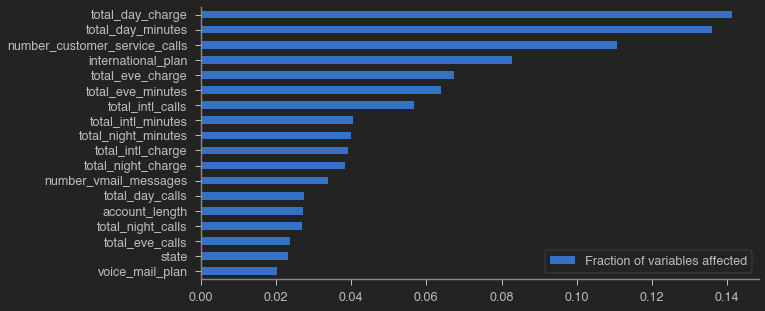

In [50]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

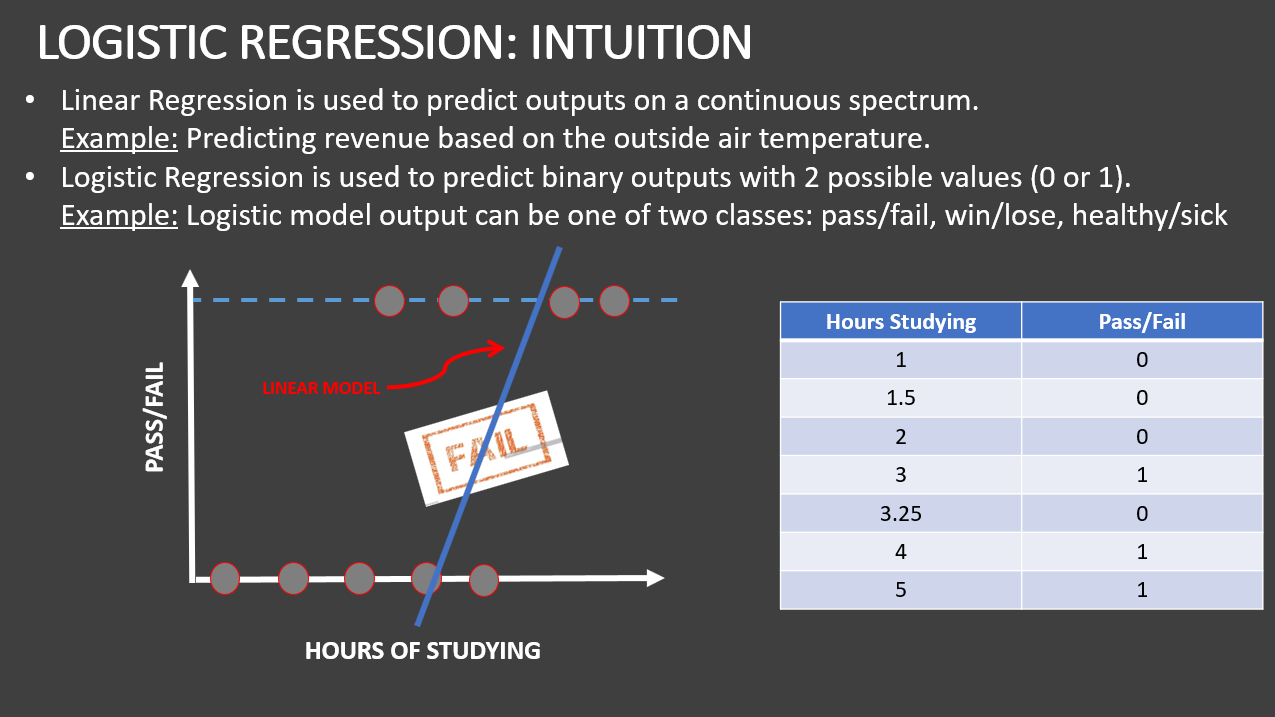

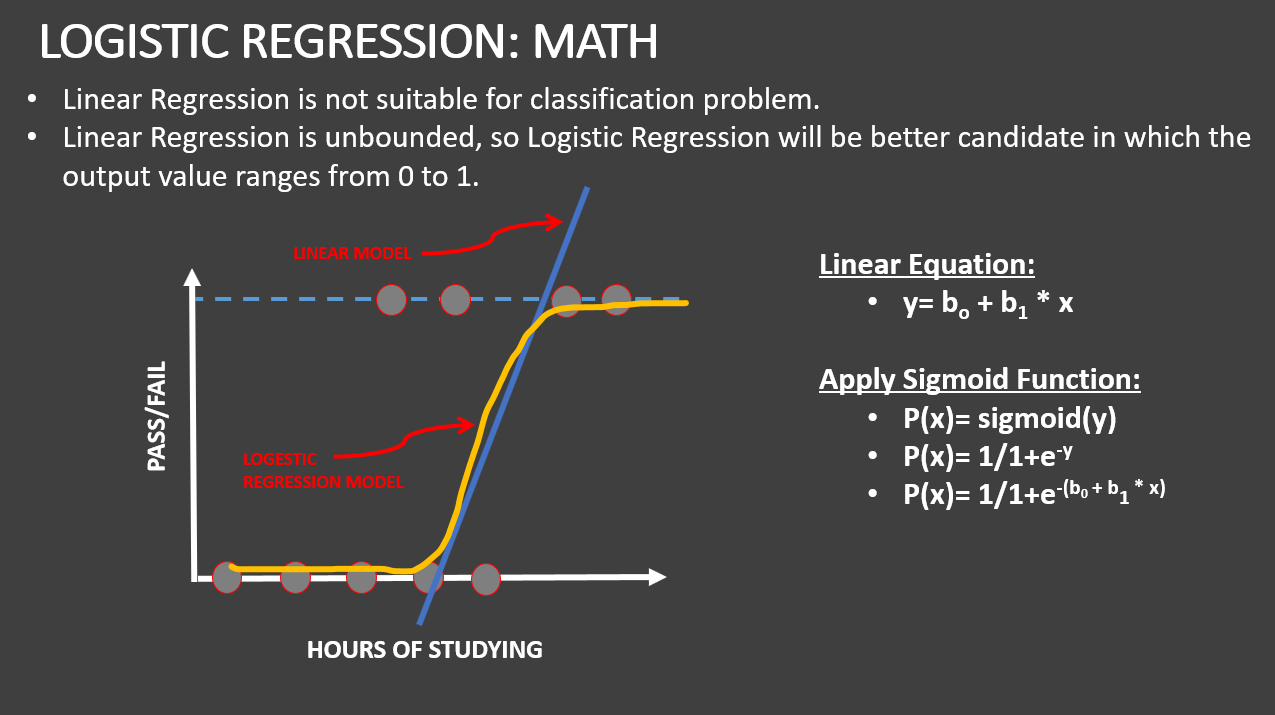

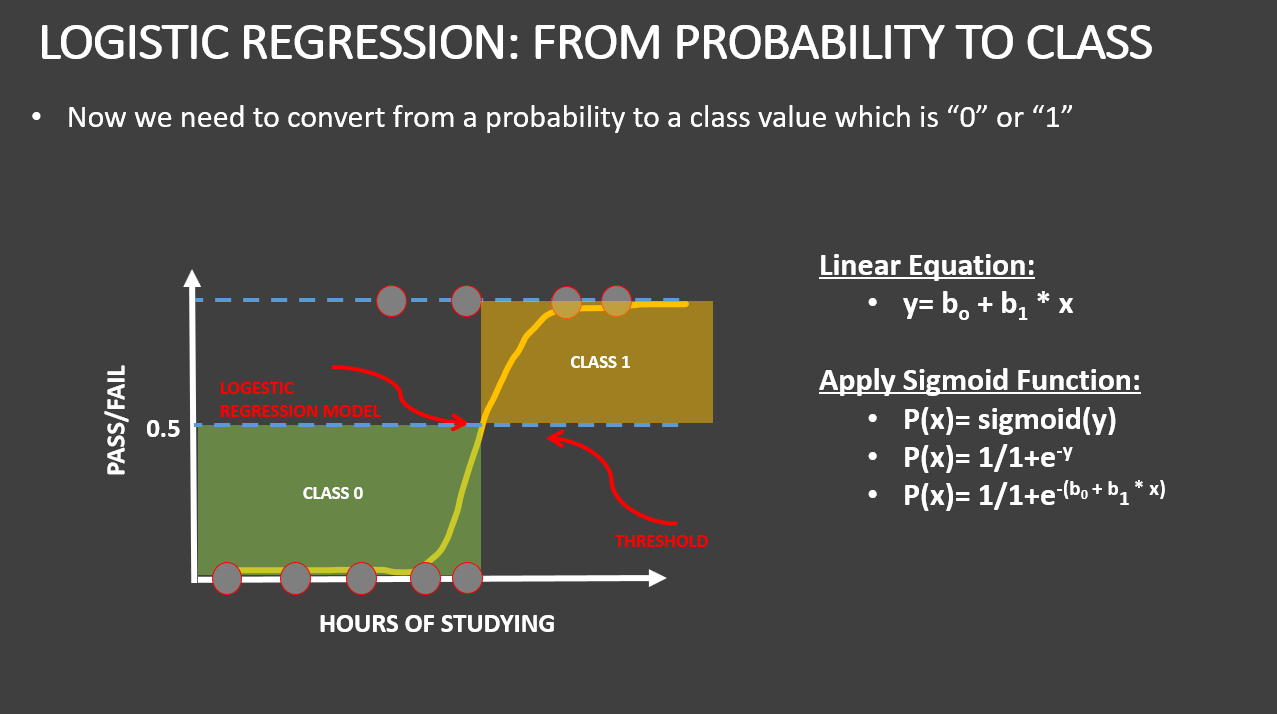

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [59]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       858
           1       0.53      0.20      0.29       142

    accuracy                           0.86      1000
   macro avg       0.70      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000



MINI CHALLENGE #5:
- Print out the confusion Matrix and comment on the results. 


<AxesSubplot:>

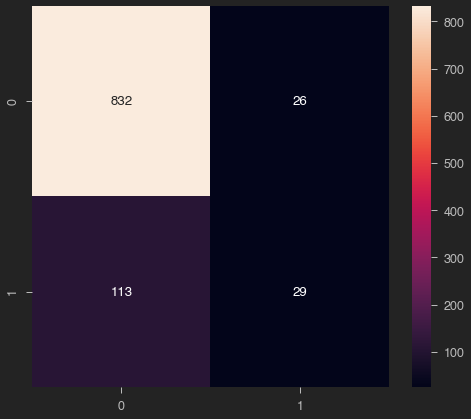

In [70]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

# TASK #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

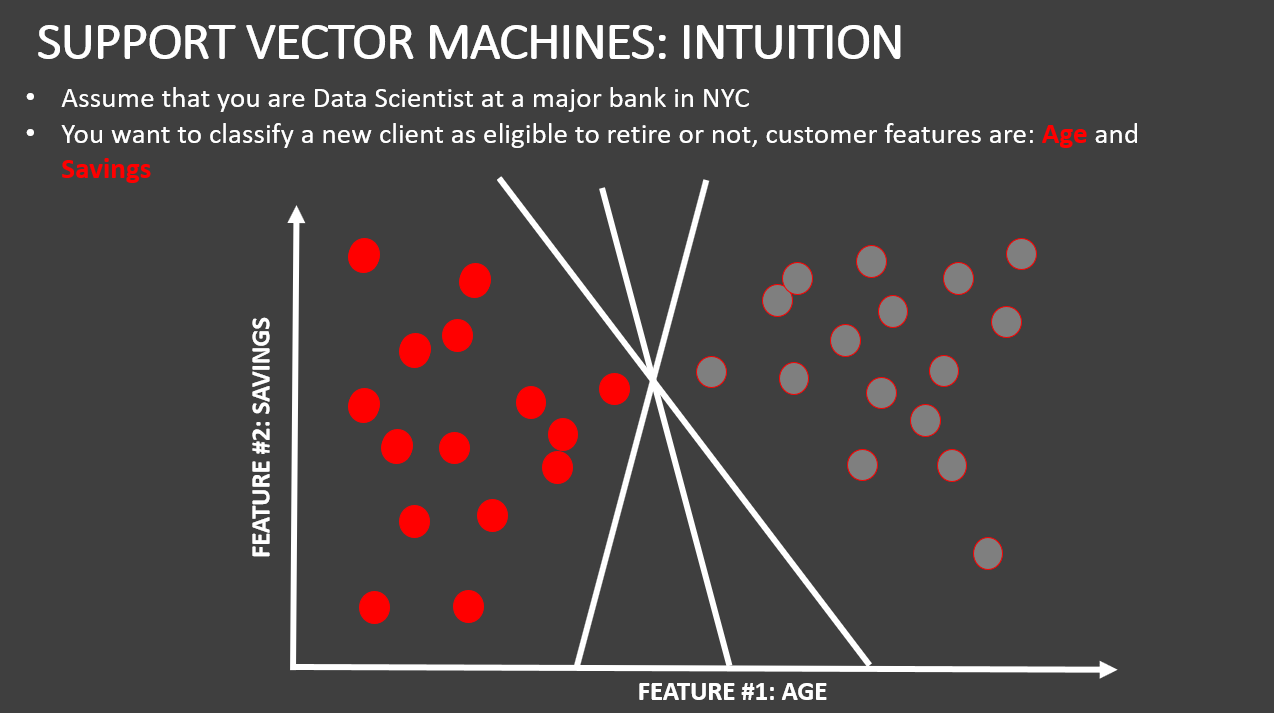

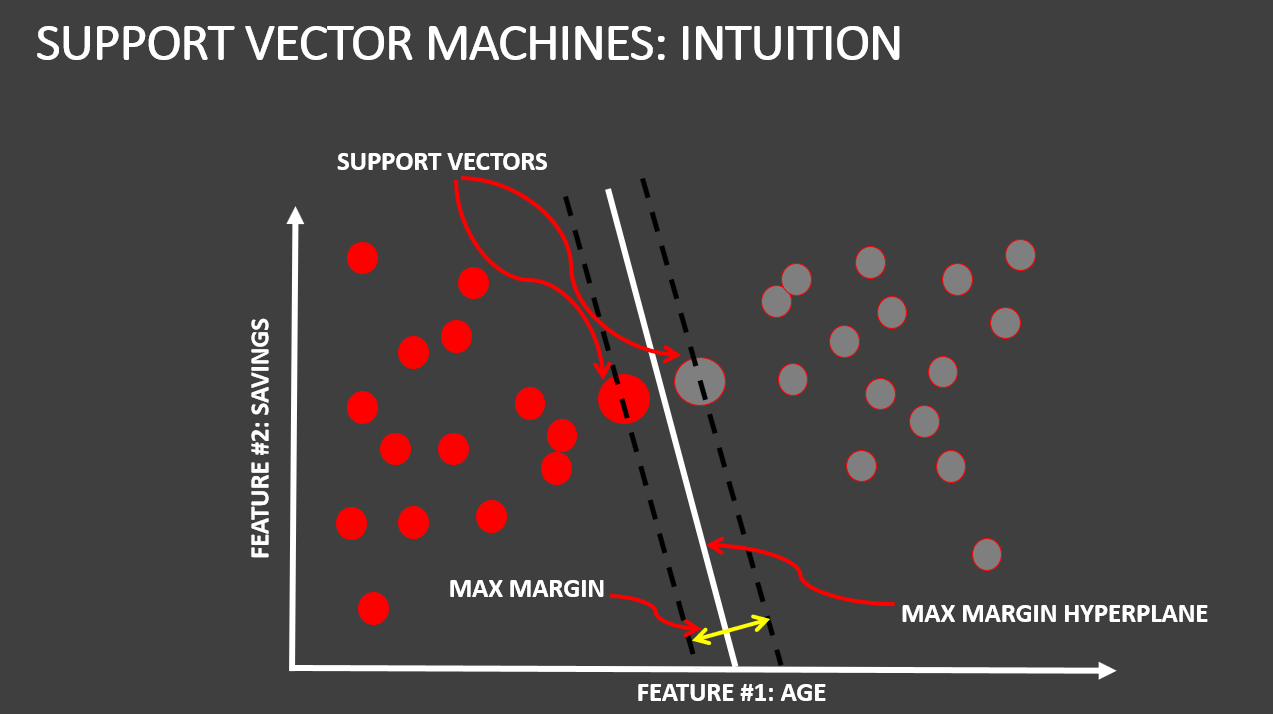

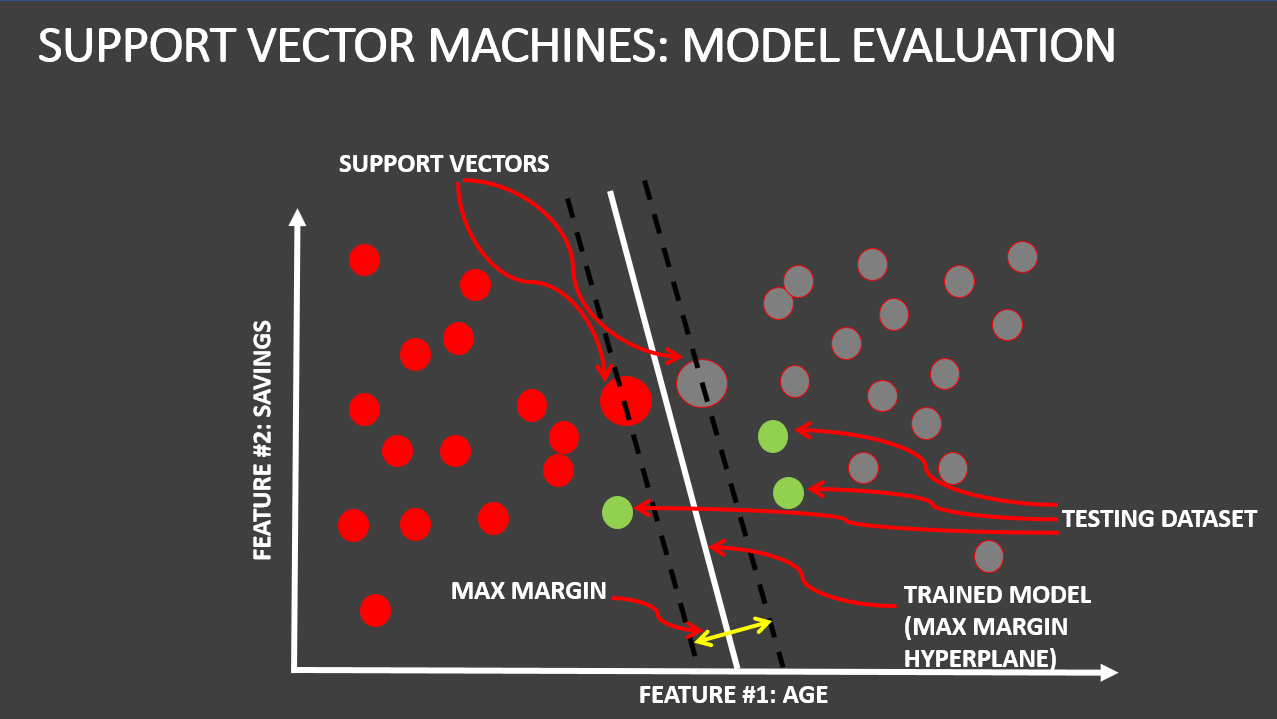

In [72]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

In [81]:
model_svm = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       858
           1       0.52      0.15      0.24       142

    accuracy                           0.86      1000
   macro avg       0.70      0.57      0.58      1000
weighted avg       0.82      0.86      0.83      1000



<AxesSubplot:>

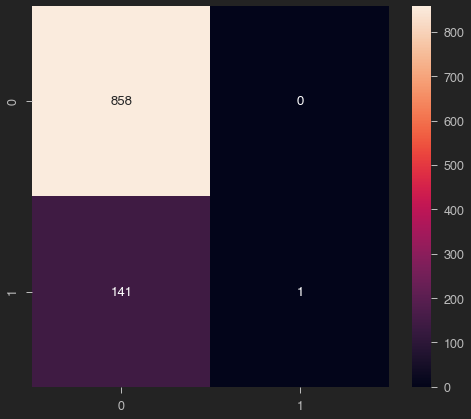

In [79]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

# TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

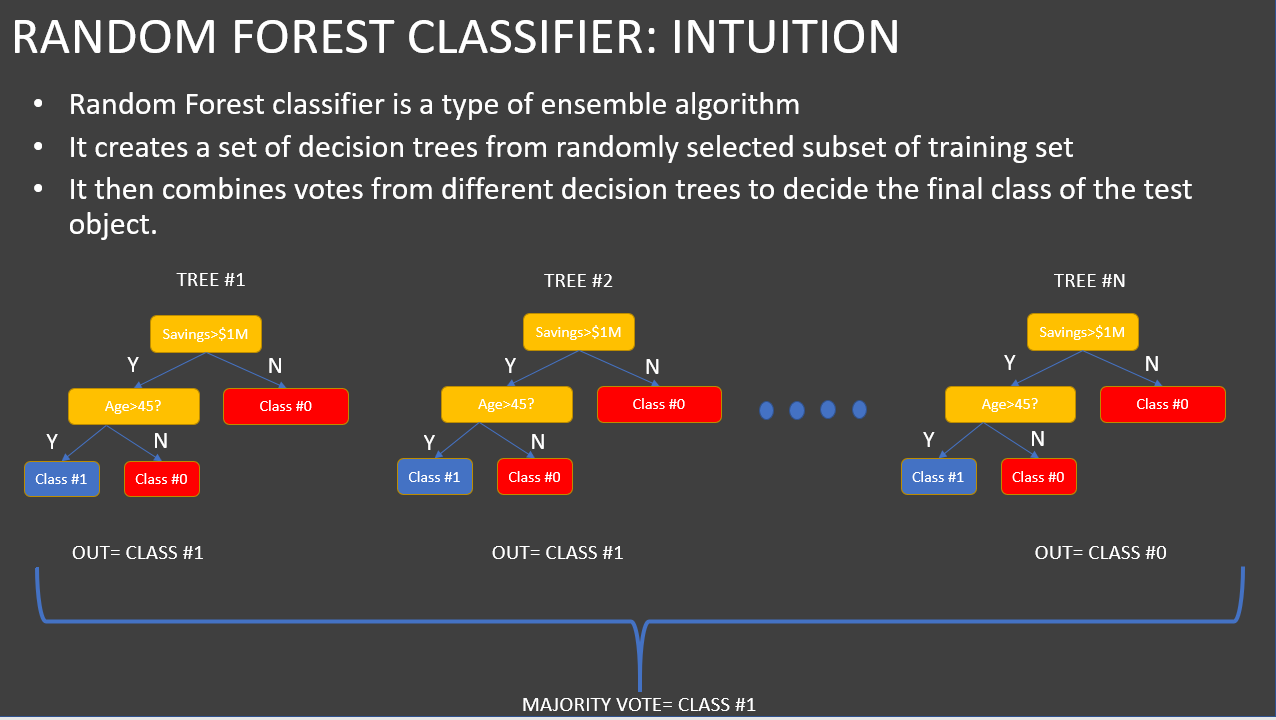

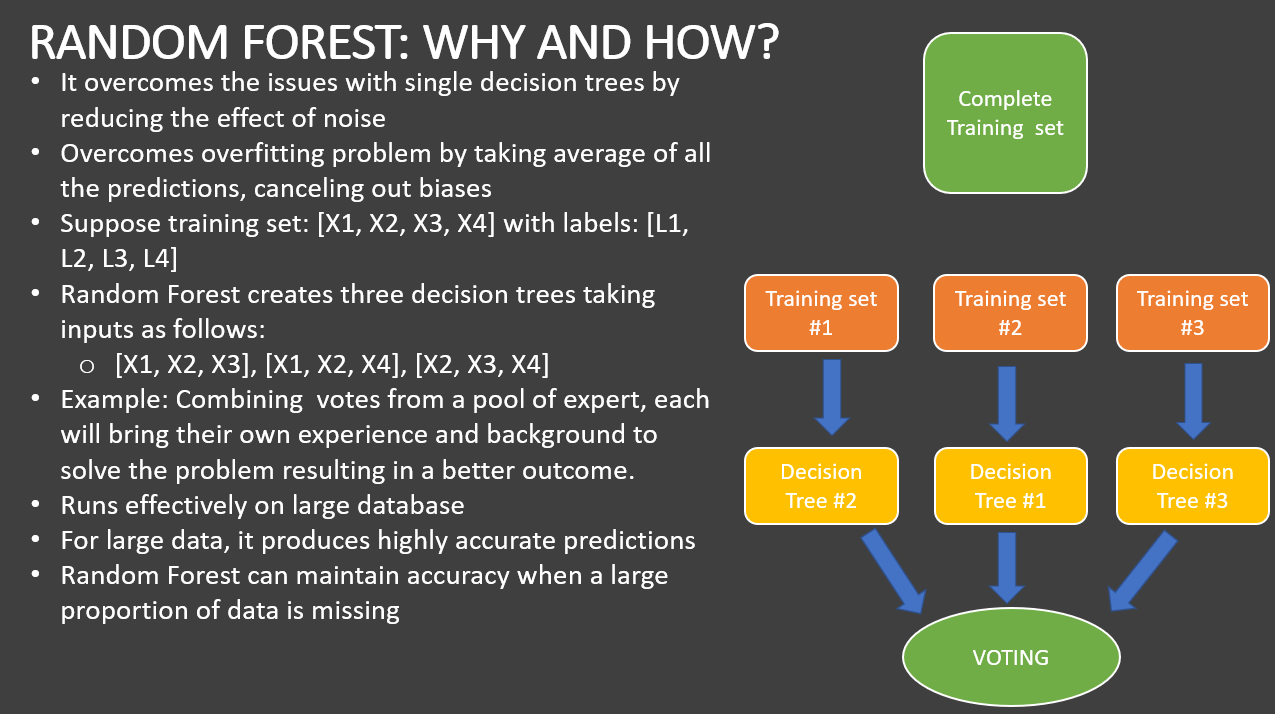

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       858
           1       0.94      0.75      0.84       142

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000



<AxesSubplot:>

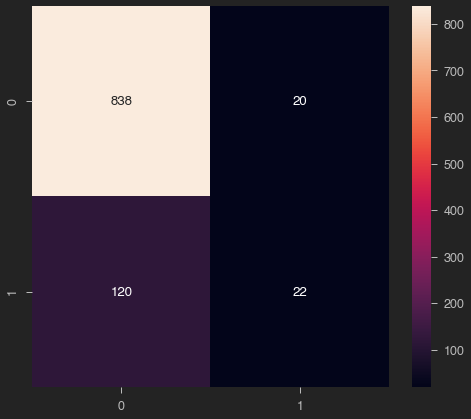

In [88]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

# TASK #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

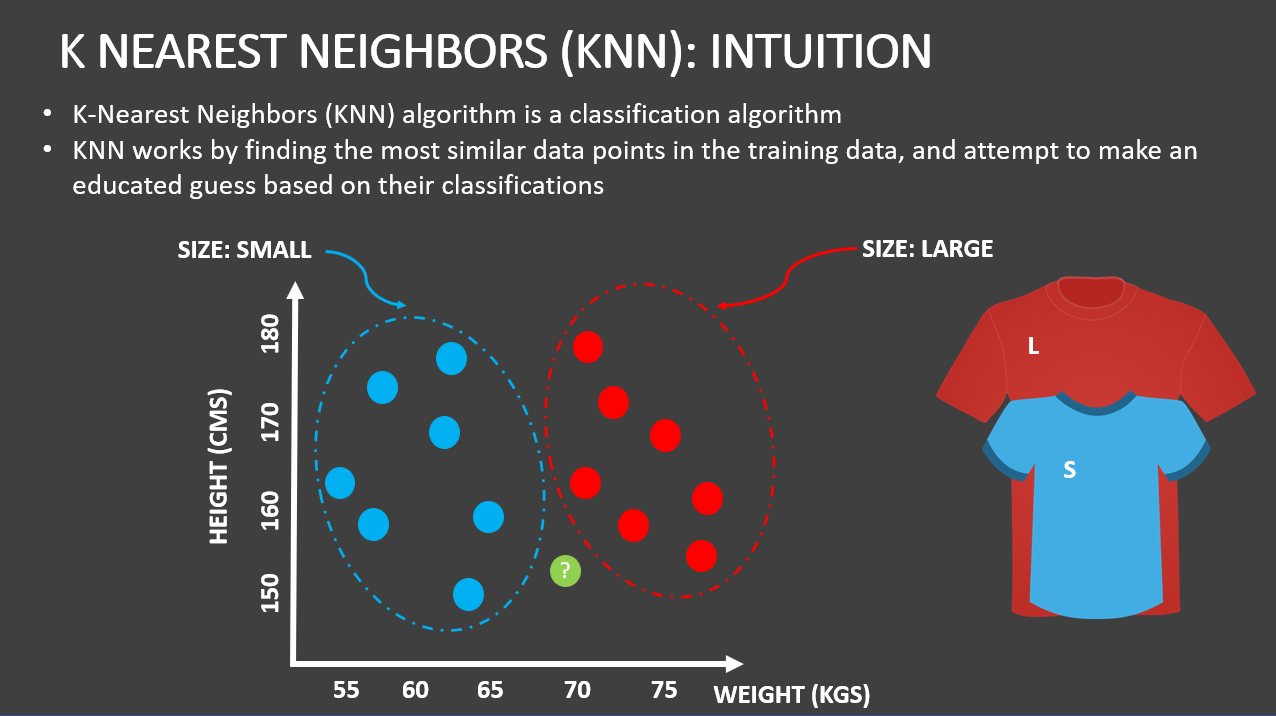

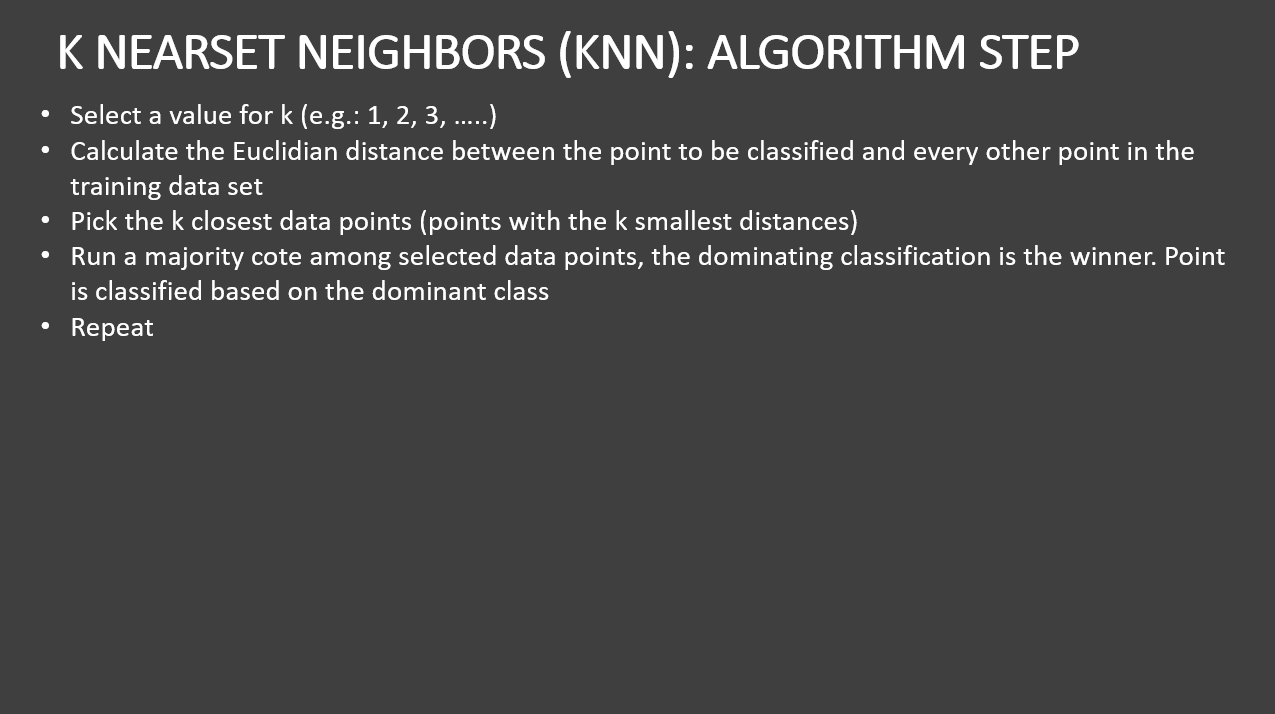

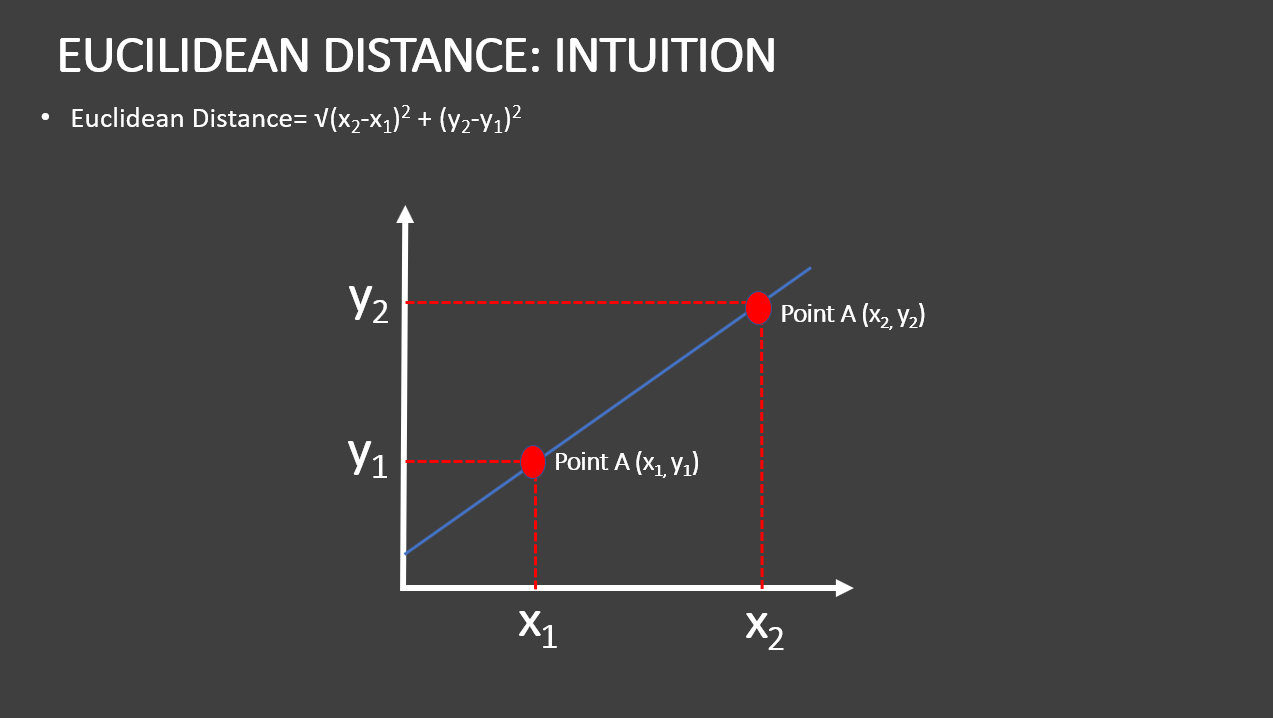

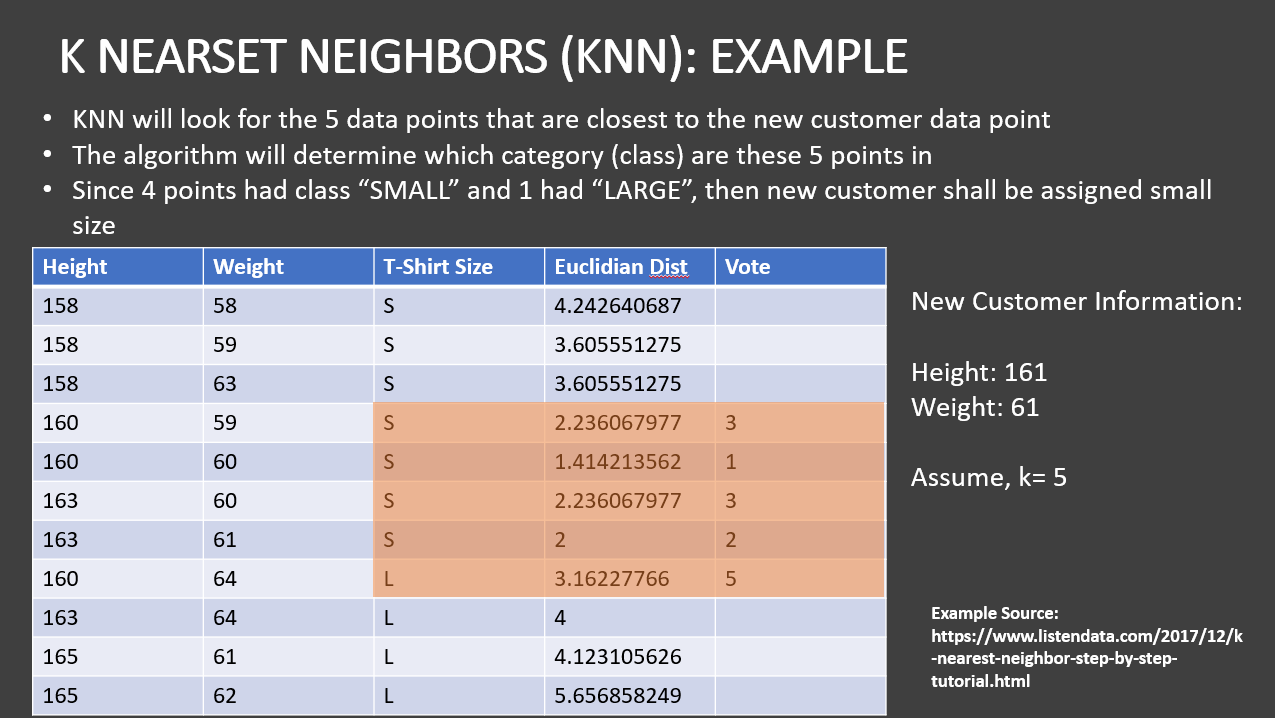

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       858
           1       0.77      0.25      0.38       142

    accuracy                           0.88      1000
   macro avg       0.83      0.62      0.66      1000
weighted avg       0.87      0.88      0.86      1000



<AxesSubplot:>

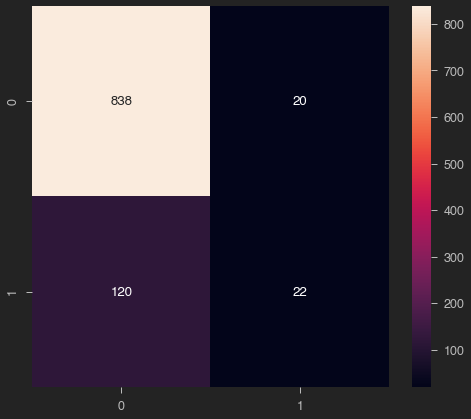

In [110]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

# TASK #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

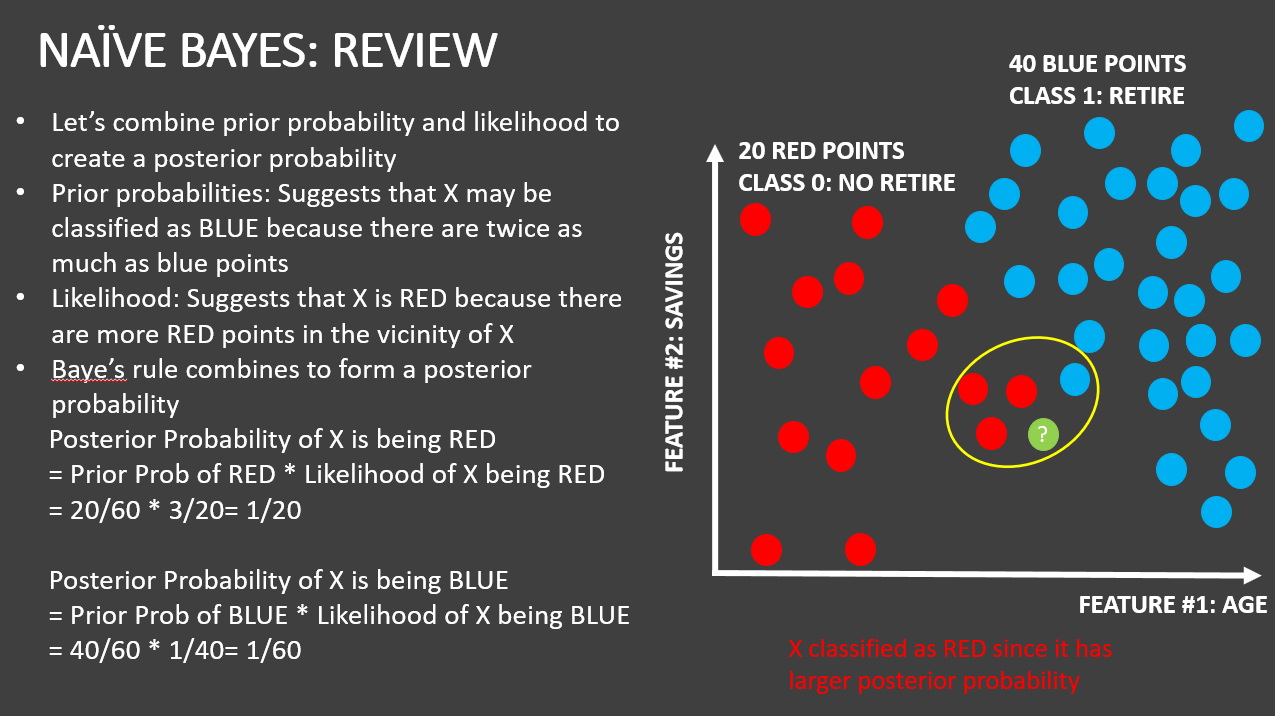

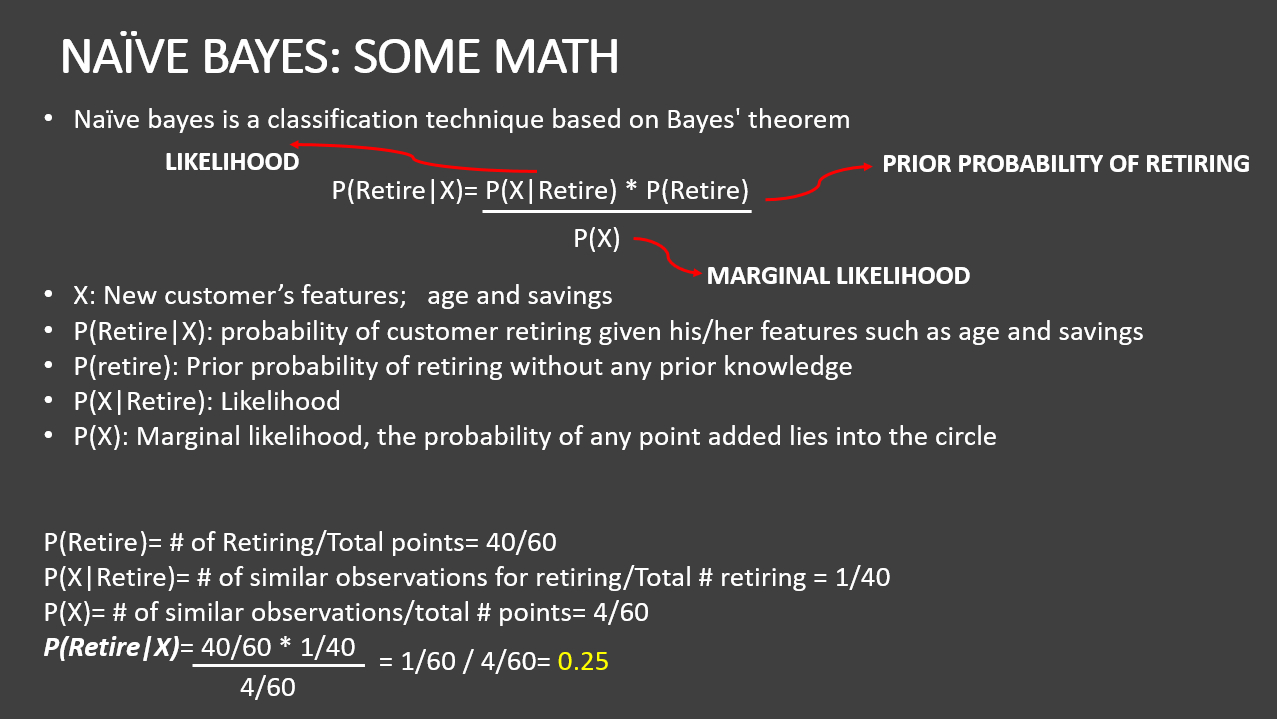

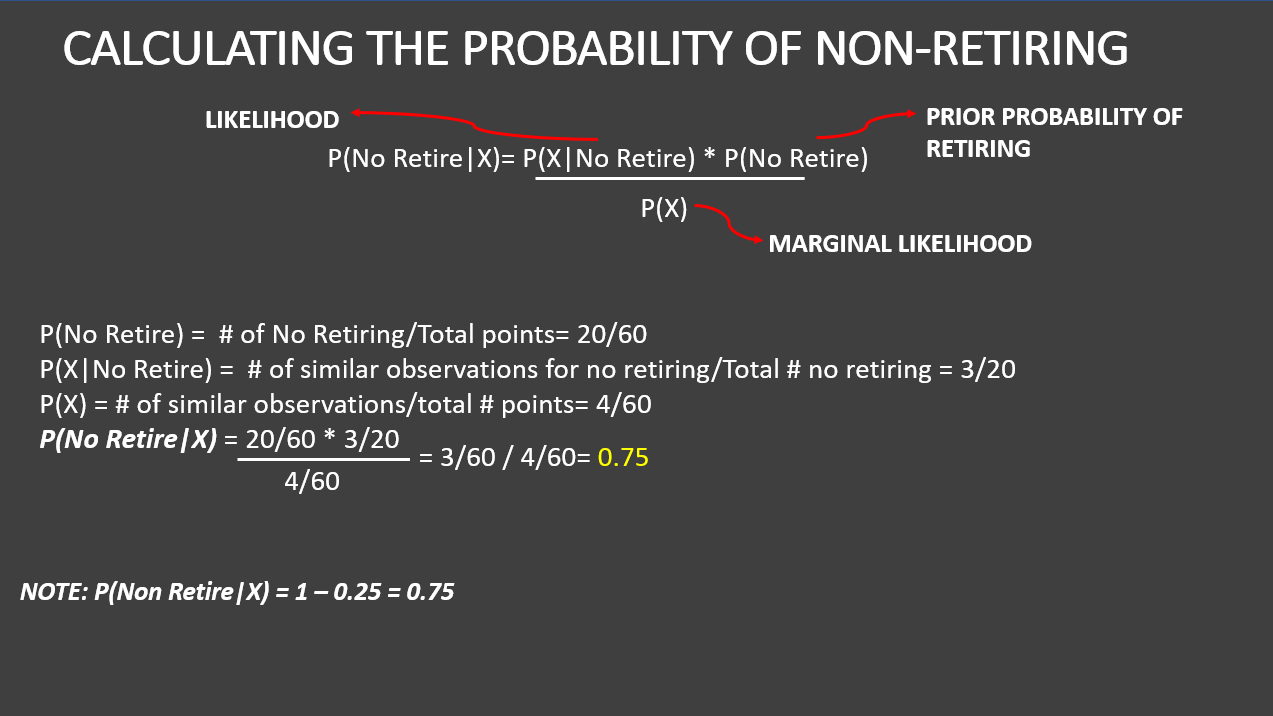

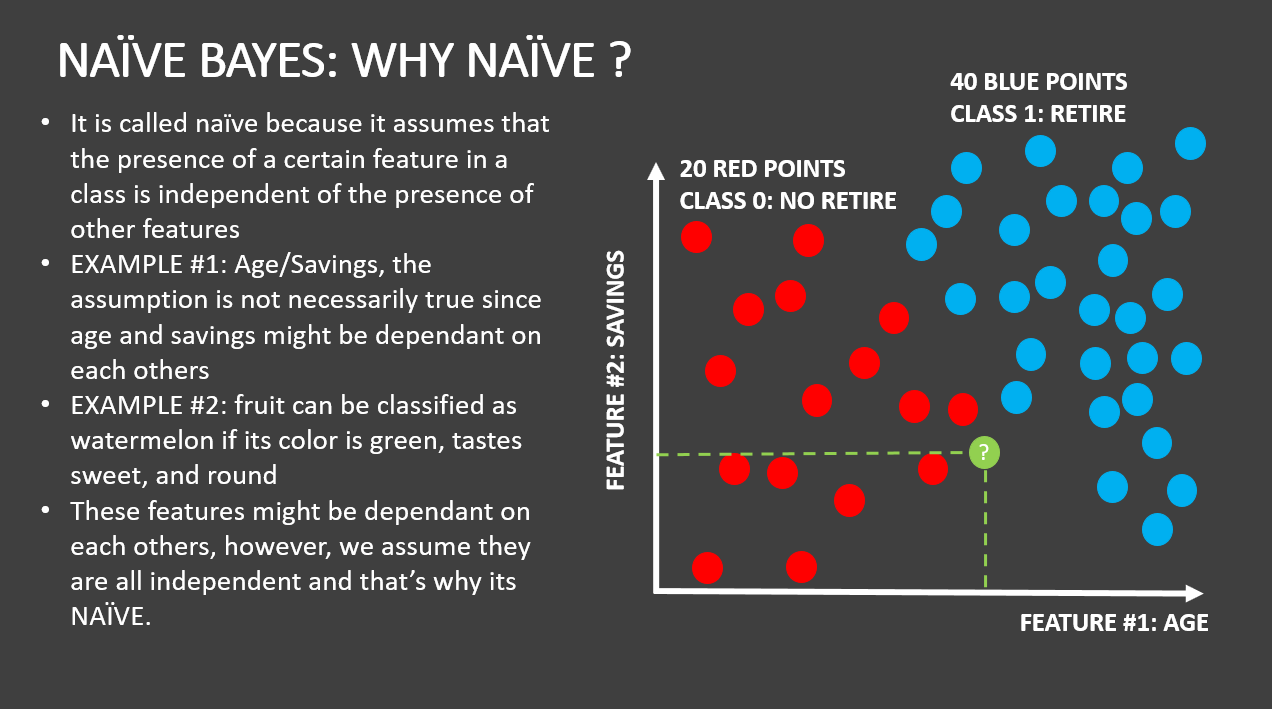

In [111]:
from sklearn.naive_bayes import GaussianNB

In [113]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       858
           1       0.52      0.49      0.51       142

    accuracy                           0.86      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.86      0.86      0.86      1000



<AxesSubplot:>

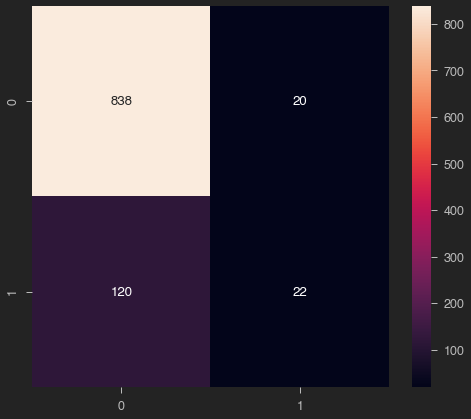

In [115]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



# TASK #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

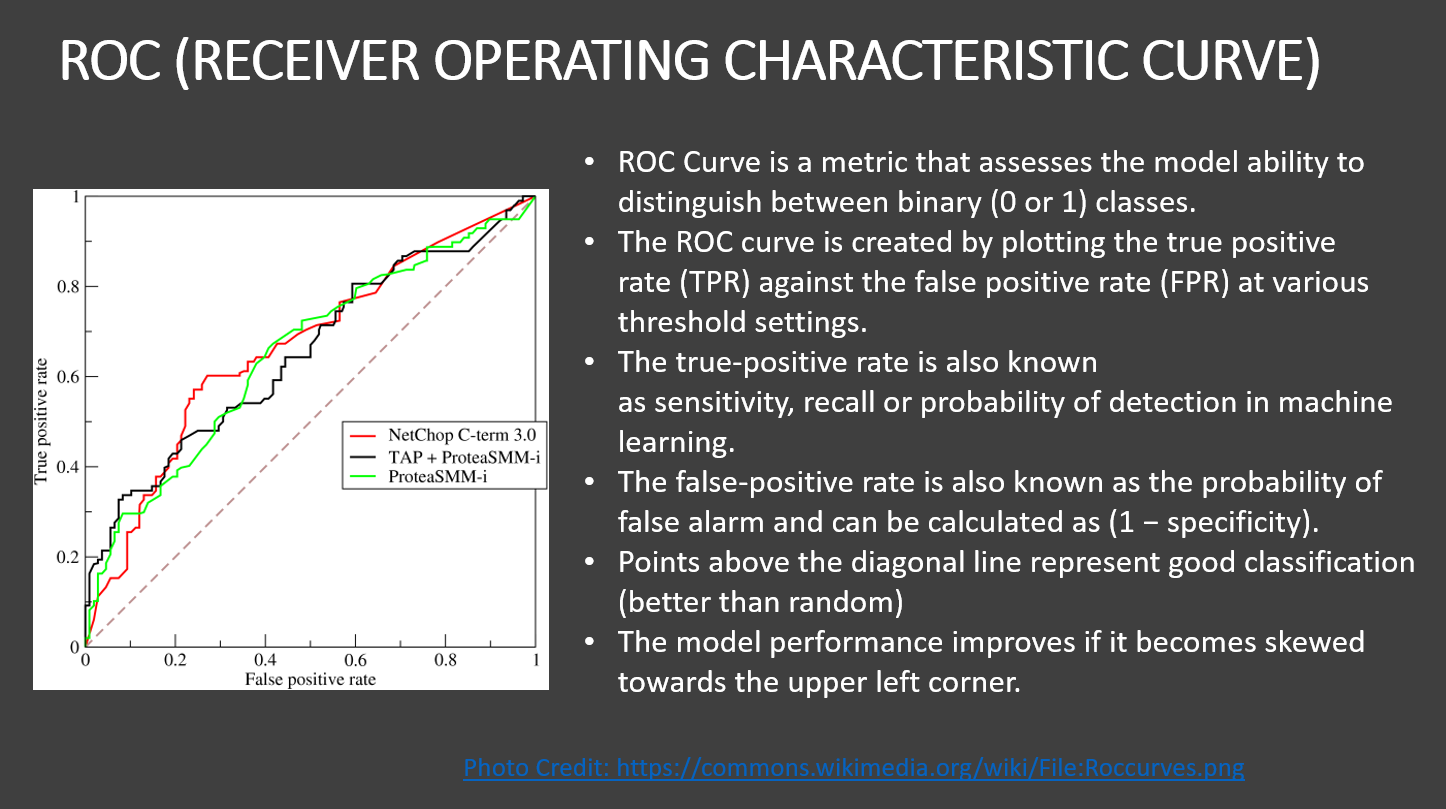

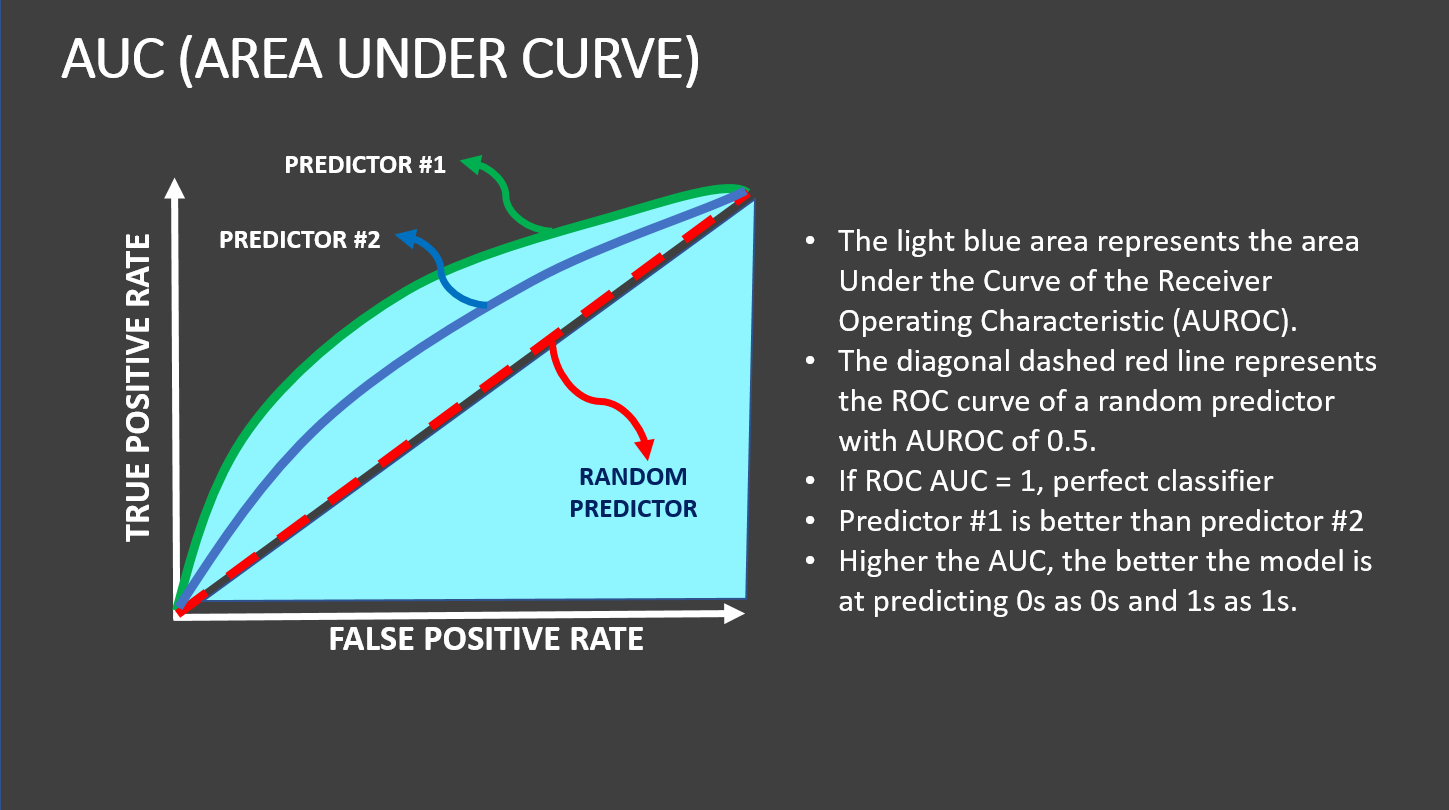

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [117]:
lr.predict_proba(X_test)

array([[0.85443765, 0.14556235],
       [0.92103423, 0.07896577],
       [0.57099015, 0.42900985],
       ...,
       [0.93522594, 0.06477406],
       [0.90149594, 0.09850406],
       [0.97617578, 0.02382422]])

In [123]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, nb.predict_proba(X_test)[:, 1], pos_label = 1)

In [124]:
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label= 1)

In [125]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.8002724974555961
Support Vector Machine:  0.8015200761679636
Random Forest:  0.9020773827111854
K-Nearest Neighbors:  0.6638514068091532
Naive Bayes:  0.8313634722085427


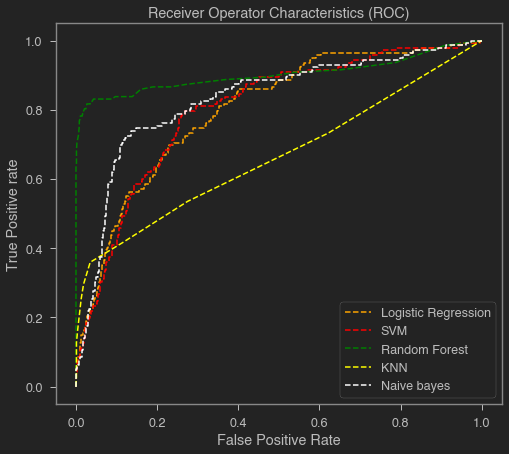

In [126]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

### CONCLUSION & PROJECT RECAP

In [127]:
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       858
           1       0.94      0.75      0.84       142

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/